#Introduction

In this Project, we explored and implemented a KNN model for predicting the likelihood of heart attacks, following a methodical data science workflow. Starting with comprehensive data preprocessing, we addressed outliers, class imbalances, and feature scaling to ensure a clean and balanced dataset. Through exploratory data analysis, statistical tests, and visualizations, we identified the most significant features contributing to heart attack prediction, while also tackling multicollinearity. Hyperparameter tuning was performed to optimize the model's performance, striking a balance between training and testing accuracy. This assignment showcases the critical role of feature engineering, visualization, and model optimization in building robust and reliable machine learning models.

##Data Dictionary
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
  Value 1: typical angina
  Value 2: atypical angina
  Value 3: non-anginal pain
  Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
#importing liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the datasets
df = pd.read_csv("/content/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Data Exploration

In [4]:
df.ndim

2

In [5]:
df.shape

(303, 14)

In [6]:
df.size

4242

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum()

1

In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()
# now 0 duplicates

0

In [11]:
# Drop rows with NaN values
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


All features have 302 non-null values, meaning there are no missing data points.

In [13]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The dataset provides key insights into heart attack predictors. The age of patients ranges from 29 to 77, with a mean of 54.4, reflecting the typical risk age group for heart disease. The gender distribution is slightly male-dominated (mean 0.68).Chest pain types are primarily of low severity (mean 0.96), and resting blood pressure averages 131.6 mmHg, with most values in the high-normal range. Cholesterol levels (mean 246.5 mg/dL) indicate a significant proportion of patients at risk due to high cholesterol. Fasting blood sugar is elevated in only 15% of patients, while maximum heart rates average 149.6 bpm, suggesting most patients retain normal exercise capacity. Depression levels (oldpeak) and slope of peak exercise ST segments (slp) reflect varying heart health, with higher values indicating better conditions. The number of major vessels colored (caa) and thalassemia types (thall) highlight arterial health risks. Finally, the target variable is fairly balanced (54% with heart attacks), making the dataset suitable for classification modeling.

In [14]:
# List of categorical columns including 'output'
categorical_cols = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall', 'output']

# Display value counts for each categorical column
for col in categorical_cols:
    print(f"Value Counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 40)

Value Counts for 'sex':
sex
1    206
0     96
Name: count, dtype: int64
----------------------------------------
Value Counts for 'exng':
exng
0    203
1     99
Name: count, dtype: int64
----------------------------------------
Value Counts for 'caa':
caa
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64
----------------------------------------
Value Counts for 'cp':
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64
----------------------------------------
Value Counts for 'fbs':
fbs
0    257
1     45
Name: count, dtype: int64
----------------------------------------
Value Counts for 'restecg':
restecg
1    151
0    147
2      4
Name: count, dtype: int64
----------------------------------------
Value Counts for 'slp':
slp
2    141
1    140
0     21
Name: count, dtype: int64
----------------------------------------
Value Counts for 'thall':
thall
2    165
3    117
1     18
0      2
Name: count, dtype: int64
----------------------------------------
Val

####The value counts provides a comprehensive view of heart attack predictors. Key observations from each  categorical features suggest that a slight gender imbalance (more males than females), a higher prevalence of individuals without exercise-induced angina, and fewer cases of severe vessel blockages or major thalassemia abnormalities. Most patients exhibit normal or slightly abnormal resting ECG results and fall within typical ranges for chest pain types and fasting blood sugar levels.
####The target variable (output) is relatively balanced, ensuring fair learning for the model.
####However, minor imbalances in some categorical features (e.g., caa, cp, thall) might impact predictions and require careful handling to maintain model fairness and accuracy.

#Data Visualizations and Feature Selection


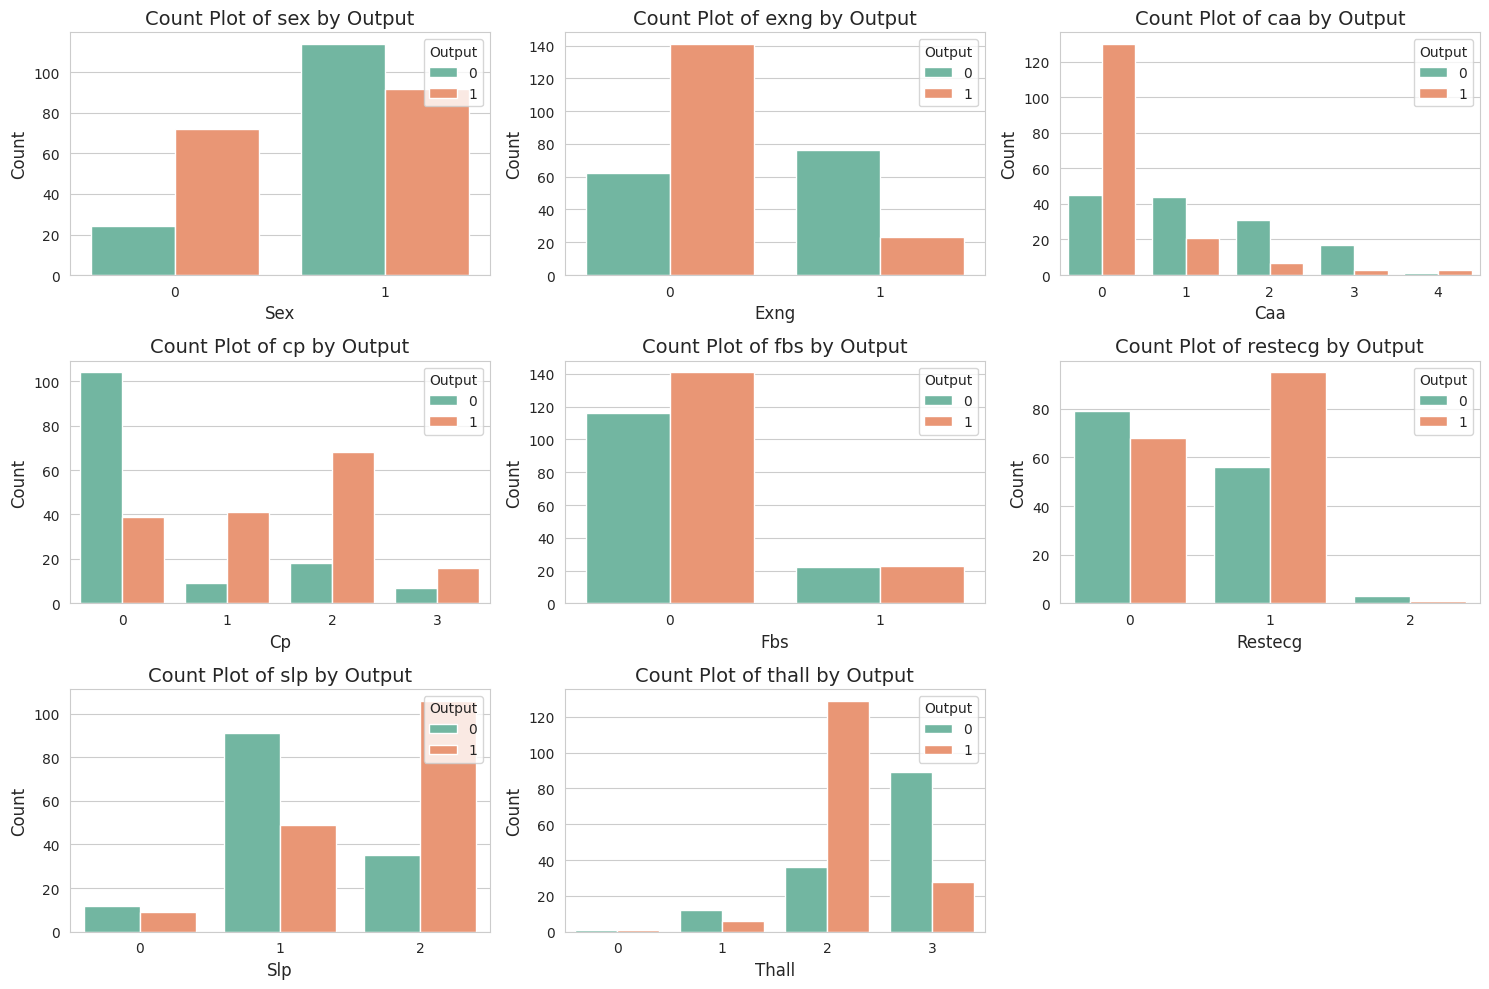

In [15]:
# List of categorical columns excluding 'output'
categorical_cols = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']

# Setting up the plot style and figure size
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Create grouped count plots for each categorical variable
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='output', ax=axes[i], palette="Set2")
    axes[i].set_title(f'Count Plot of {col} by Output', fontsize=14)
    axes[i].set_xlabel(col.capitalize(), fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].legend(title='Output', loc='upper right')

# Remove any unused subplot axes
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##Gender Bias:
The dataset is skewed towards males, which may impact model generalization.

##Significant Predictors:
cp, caa, and thall show strong associations with output and should be carefully considered during feature selection.

##Potential Sampling Bias:
 Variables like caa and exng need further validation to confirm their relationship with heart attack outcomes.

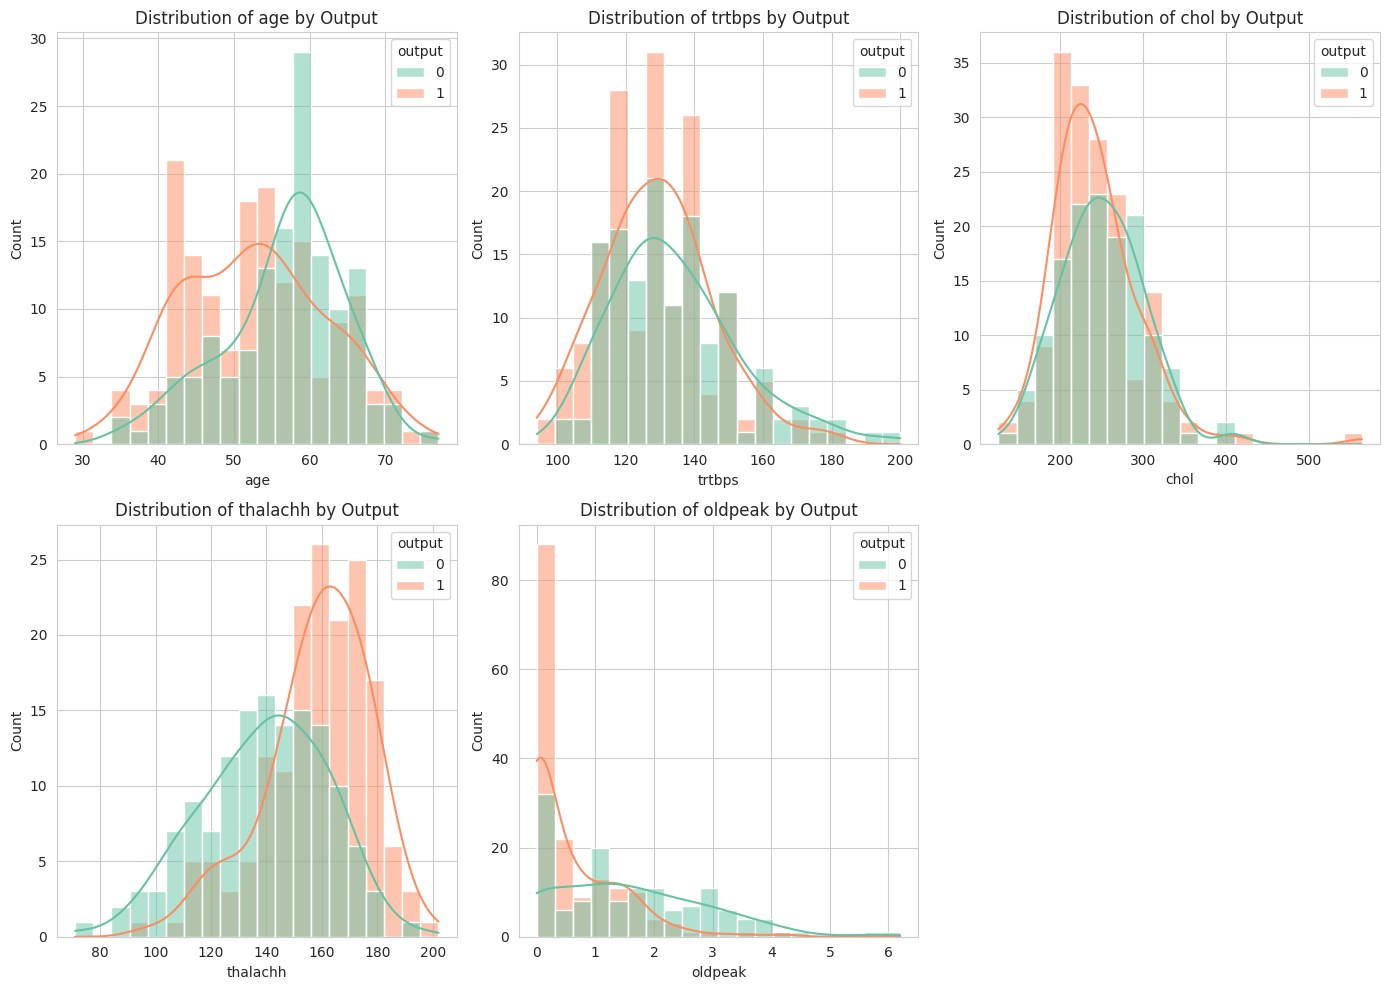

In [16]:
#We'll explore the distributions of the continuous variables (age, trtbps, chol, thalachh, oldpeak) and their relationship with the target (output)

# Continuous features
continuous_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Histograms for each continuous feature
plt.figure(figsize=(14, 10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, hue='output', kde=True, bins=20, palette='Set2')
    plt.title(f'Distribution of {col} by Output')
plt.tight_layout()
plt.show()



####The histograms reveal key patterns among continuous features related to heart disease. Age indicates that heart disease is more common in middle-aged individuals (40–60 years), while those without heart disease are concentrated in the 50–70 age range. Resting blood pressure (trtbps) shows moderate predictive power, with individuals with heart disease often in the 130–150 mmHg range. Cholesterol (chol) distributions overlap heavily between classes, with some outliers but limited distinction overall. Maximum heart rate (thalachh) is a strong predictor, as higher rates (150–200 bpm) are associated with heart disease, while lower rates (80–140 bpm) are more common without it. Lastly, ST depression (oldpeak) shows a negative correlation with heart disease, as lower values (0–2 units) are linked to heart disease, whereas higher values (2–4+ units) are seen in individuals without it.

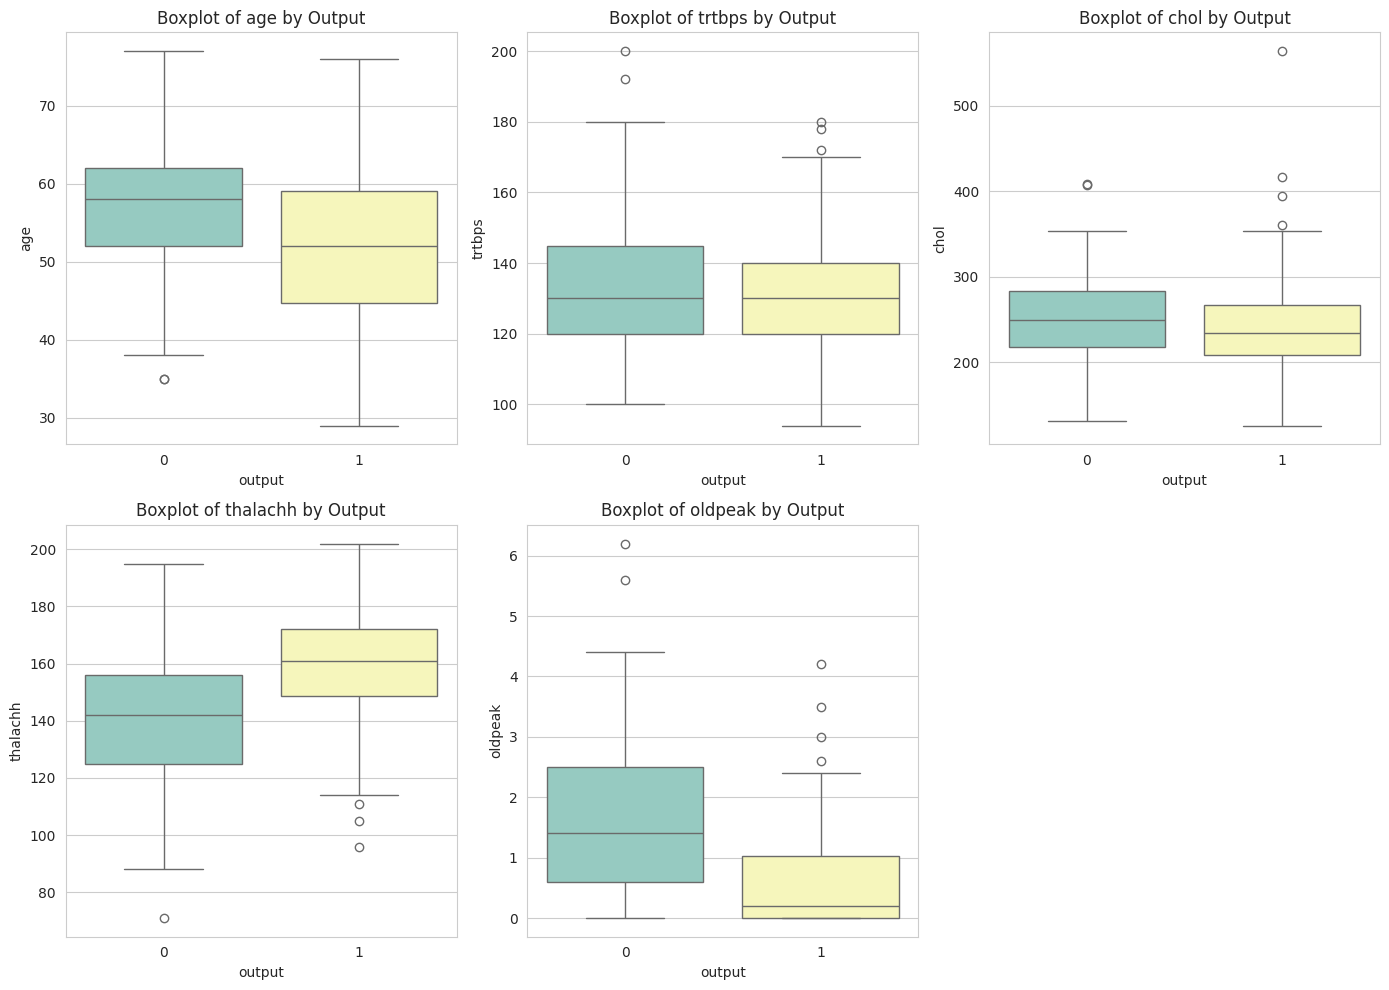

In [17]:
# Boxplots to show distribution and outliers
plt.figure(figsize=(14, 10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='output', y=col, palette='Set3')
    plt.title(f'Boxplot of {col} by Output')
plt.tight_layout()
plt.show()

##Insights from Boxplots
###Outliers:
Features like chol and oldpeak show significant outliers, which might need to be handled (e.g., through transformation or removal) during preprocessing.
Extreme outliers in chol are particularly noticeable and might not contribute meaningfully to predictions.

###Median Values:
For features like thalachh and oldpeak, the medians differ significantly between the two classes (output = 0 and output = 1), reinforcing their predictive strength.
Features such as trtbps and chol have overlapping medians, suggesting weaker predictive value.

###Spread of Values:
thalachh and oldpeak show distinct spreads between the two output classes, making them valuable for model building.
On the other hand, features like trtbps have similar distributions across the two classes.

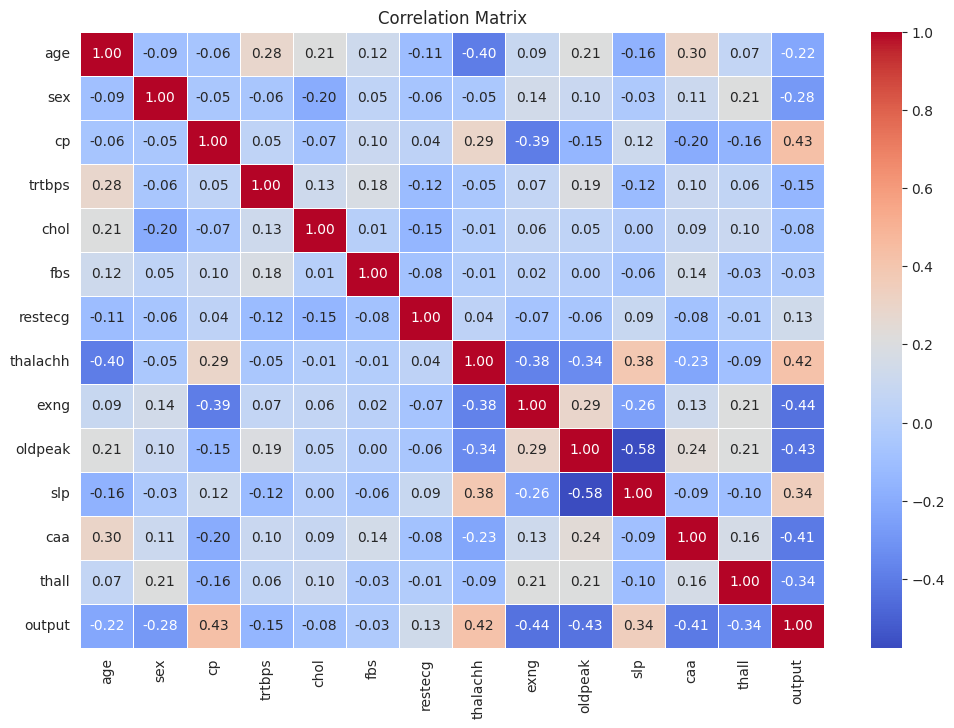

In [18]:
#The correlation matrix will help identify linear relationships between features and the target.

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

##Strong Correlations with Output:

cp (chest pain type) has the strongest positive correlation with output (0.43). Patients with higher chest pain scores are more likely to have heart disease.
thalachh (maximum heart rate achieved) is also positively correlated with output (0.42), indicating that higher heart rates may be associated with heart disease.

##Negative Correlations with Output:

exng (exercise-induced angina) has the strongest negative correlation (-0.44). Patients with exercise-induced angina are less likely to have heart disease.
oldpeak (ST depression induced by exercise) (-0.43), caa (number of major vessels) (-0.41), and thall (thalassemia) (-0.34) also show notable negative correlations with output.

##Potential Multicollinearity:

caa and thal have a moderately strong correlation (0.41), indicating potential multicollinearity, which might affect model performance.
oldpeak and slp (slope) are negatively correlated (-0.58), suggesting these features interact closely.

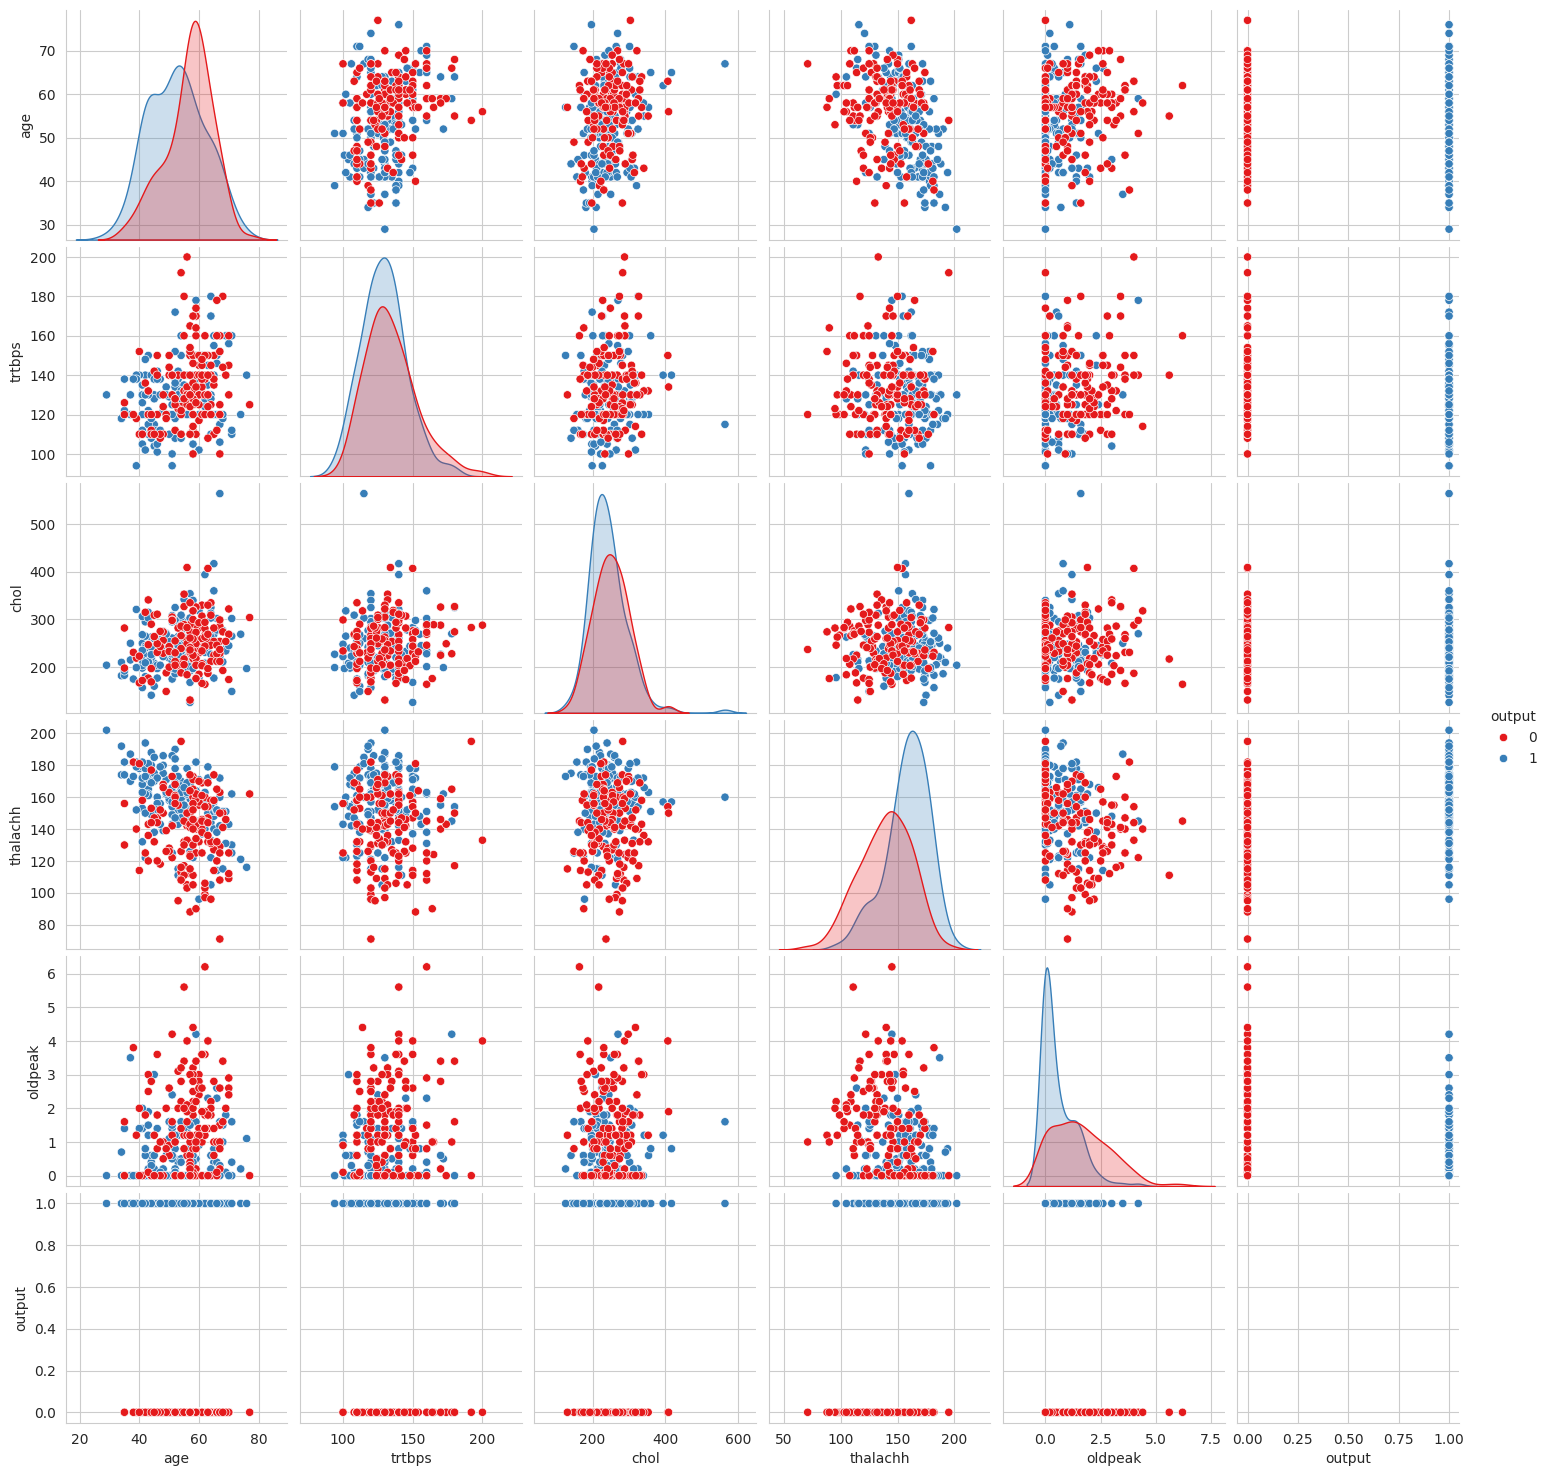

In [19]:
#A pair plot provides a quick way to visualize bivariate relationships between features. Focus on continuous variables and the target.

# Pair plot for continuous variables
sns.pairplot(df, vars=continuous_cols + ['output'], hue='output', palette='Set1', diag_kind='kde')
plt.show()

 output = 1 (red dots) and another for output = 0 (blue dots).

####The pair plot reveals distinct clusters for the target classes, with features like age, trtbps, chol, thalachh, and oldpeak showing varying degrees of class separation. Oldpeak and thalachh stand out as strong predictors, as they exhibit clear distinctions between individuals with and without heart disease. Features like age and cholesterol show some overlap but still hold potential for classification, particularly when combined with other features. The diagonal KDE plots highlight features with differing distributions, reinforcing their utility in distinguishing outcomes. Oldpeak’s lower values correlate with no heart disease (output = 0), while higher values are associated with heart disease (output = 1).

####Additionally, the pair plot aids in identifying correlations between features, such as potential redundancy between highly correlated variables. For instance, if trtbps and cholesterol were strongly related, one could be dropped to streamline the model. By highlighting class separability, scatter plots, such as thalachh versus output, confirm thalachh’s predictive importance. Weakly predictive features with significant overlap between classes can be deprioritized or removed. These insights, coupled with statistical methods like correlation matrices or feature importance scores, can refine feature selection and enhance model performance.




In [20]:
#To select the most important features, we can use statistical techniques like ANOVA for continuous features and Chi-Square tests for categorical features.

from scipy.stats import f_oneway

# ANOVA test for each continuous feature
for col in continuous_cols:
    f_stat, p_value = f_oneway(df[df['output'] == 0][col], df[df['output'] == 1][col])
    print(f"Feature: {col} | F-statistic: {f_stat:.2f}, P-value: {p_value:.3f}")

Feature: age | F-statistic: 15.47, P-value: 0.000
Feature: trtbps | F-statistic: 6.56, P-value: 0.011
Feature: chol | F-statistic: 2.00, P-value: 0.158
Feature: thalachh | F-statistic: 64.24, P-value: 0.000
Feature: oldpeak | F-statistic: 67.72, P-value: 0.000


The ANOVA test examines whether the means of a continuous feature differ significantly across the categories of the target variable (output in this case). A low p-value (< 0.05) suggests that the feature has a statistically significant relationship with the target.



In [21]:
from scipy.stats import chi2_contingency

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Chi-Square test for categorical features
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['output'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Feature: {col} | Chi-Square: {chi2:.2f}, P-value: {p:.3f}")

Feature: sex | Chi-Square: 23.08, P-value: 0.000
Feature: cp | Chi-Square: 80.98, P-value: 0.000
Feature: fbs | Chi-Square: 0.09, P-value: 0.761
Feature: restecg | Chi-Square: 9.73, P-value: 0.008
Feature: exng | Chi-Square: 55.46, P-value: 0.000
Feature: slp | Chi-Square: 46.89, P-value: 0.000
Feature: caa | Chi-Square: 73.69, P-value: 0.000
Feature: thall | Chi-Square: 84.61, P-value: 0.000


The Chi-Square test evaluates whether there is an association between a categorical feature and the target variable. A low p-value (< 0.05) suggests a significant relationship.

Based on these two results, the following features should be prioritized in the model:

Continuous: thalachh, oldpeak, age, trtbps.

Categorical: cp, exng, slp, caa, thall, sex, and restecg.

Features like chol and fbs can either be excluded or further investigated (e.g., interactions or transformations).


##Final Selected Features

Based on the analysis from the KDE plots, boxplots, correlation matrix, ANOVA/Chi-Square tests, and pair plot, we can identify the best features for KNN modeling by considering the statistical significance, visual separation between target classes, and practical usability for modeling. Here's a selection of the features and the reasons for choosing them:

thalachh

oldpeak

cp

exng

caa

slp

These features are chosen based on their high statistical significance, clear visual separation between classes, and relevance to the target variable. They will likely improve KNN's ability to group similar observations and predict outcomes effectively.

Selected Features for KNN Modeling

thalachh (Maximum Heart Rate Achieved):
From the ANOVA test, this feature has a very high F-statistic (64.24) and a p-value of 0.000, making it a highly significant predictor.
The KDE plots and pair plots show clear differences in distribution between the target classes (output = 0 and output = 1).
It is highly correlated with the target (output) in the correlation matrix (0.42).

oldpeak (ST Depression Induced by Exercise):
ANOVA shows it as one of the most significant features with a high F-statistic (67.72) and a p-value of 0.000.
The pair plot demonstrates a clear separation between the classes along this feature.
It has a moderately strong negative correlation with output (-0.43).

cp (Chest Pain Type):
The Chi-Square test shows a very strong association with the target variable (Chi-Square = 80.98, p-value = 0.000).
It is one of the most significant categorical features, with distinct distributions visible in boxplots.

exng (Exercise-Induced Angina):
Chi-Square test indicates a strong association (Chi-Square = 55.46, p-value = 0.000).
This feature is binary and highly interpretable for KNN as it can help in grouping similar instances.

caa (Number of Major Vessels Colored by Fluoroscopy):
Chi-Square test indicates high significance (Chi-Square = 73.69, p-value = 0.000).
The correlation matrix shows it has a notable negative correlation with the target (-0.41).
The pair plot shows visible clustering patterns around this feature.

slp (Slope of the Peak Exercise ST Segment):
Chi-Square test indicates strong significance (Chi-Square = 46.89, p-value = 0.000).
It shows clear separation in the pair plot and is moderately correlated with output (0.34).

Reason for Excluding Other Features

chol (Cholesterol):
ANOVA p-value is 0.158, showing no significant association with the target.
Pair plots and KDE plots show overlapping distributions with poor separation between classes.

fbs (Fasting Blood Sugar):
Chi-Square test indicates no significant relationship (p-value = 0.761).
It provides minimal information for distinguishing between target classes.

trtbps (Resting Blood Pressure):
ANOVA p-value is 0.011, showing moderate significance.
However, its pair plot does not show distinct clustering, and its correlation with output is low (-0.15).



#Data Preprocessing for Machine Learning

In [22]:
#creating a new DataFrame with the selected features, perform outlier detection and scaling, and check for class imbalance.


# Selected features based on earlier analysis
selected_features = ['age', 'thalachh', 'oldpeak', 'cp', 'exng', 'caa', 'thall', 'output']

# Create a new DataFrame with the selected features
df_selected = df[selected_features]

df_selected.head()


,age,thalachh,oldpeak,cp,exng,caa,thall,output
0,63,150,2.3,3,0,0,1,1
1,37,187,3.5,2,0,0,2,1
2,41,172,1.4,1,0,0,2,1
3,56,178,0.8,1,0,0,2,1
4,57,163,0.6,0,1,0,2,1


In [23]:
# Check for class imbalance
class_distribution = df_selected['output'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 output
1    164
0    138
Name: count, dtype: int64


Class Distribution:

Output 1 (Positive cases): 53.67%

Output 0 (Negative cases): 46.33%

The classes are fairly balanced, so no action is required for imbalance.

In [24]:
# Outlier detection (example: Z-score method for continuous features)
from scipy.stats import zscore

continuous_features = ['age', 'thalachh', 'oldpeak']
z_scores = df_selected[continuous_features].apply(zscore)

# Mark rows with outliers (absolute Z-score > 3 as a threshold)
outliers = (z_scores.abs() > 3).any(axis=1)
print("Number of outliers:", outliers.sum())

Number of outliers: 3


In [25]:
# Remove rows with outliers
df_cleaned = df_selected[~outliers]

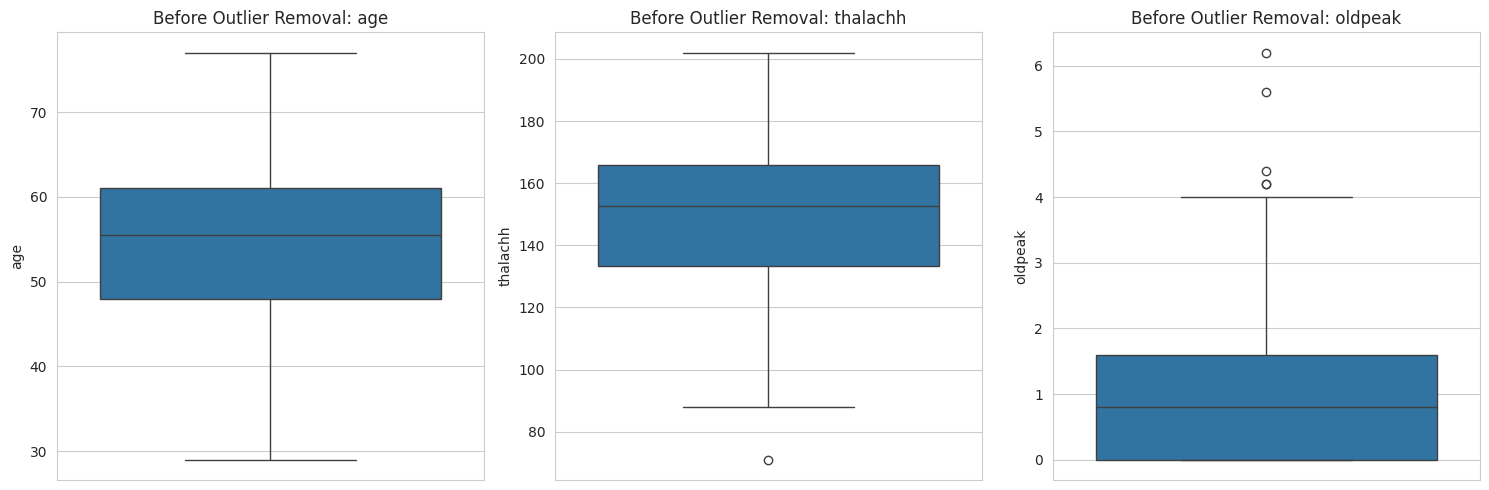

In [26]:
# Boxplots for continuous features BEFORE outlier removal
plt.figure(figsize=(15, 5))
for i, feature in enumerate(continuous_features):
    plt.subplot(1, len(continuous_features), i + 1)
    sns.boxplot(y=df_selected[feature])
    plt.title(f'Before Outlier Removal: {feature}')

plt.tight_layout()
plt.show()

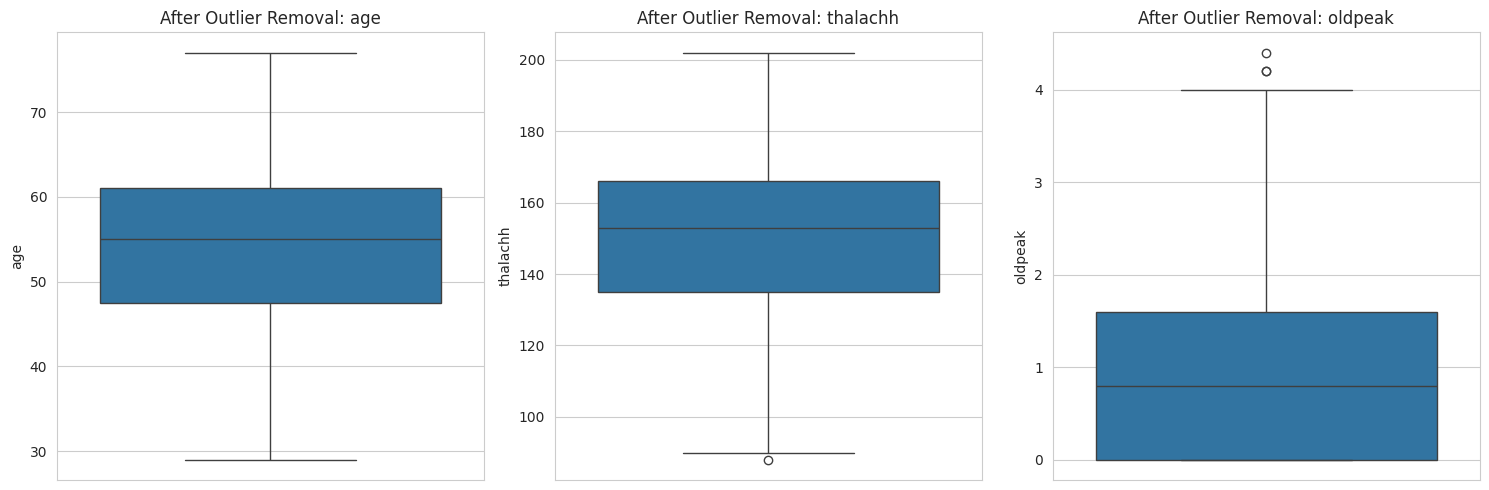

In [27]:
# Boxplots for continuous features AFTER outlier removal
plt.figure(figsize=(15, 5))
for i, feature in enumerate(continuous_features):
    plt.subplot(1, len(continuous_features), i + 1)
    sns.boxplot(y=df_cleaned[feature])
    plt.title(f'After Outlier Removal: {feature}')

plt.tight_layout()
plt.show()


In [28]:
# Scale continuous features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned[continuous_features] = scaler.fit_transform(df_cleaned[continuous_features])

# Resulting DataFrame
df_cleaned.head()

,age,thalachh,oldpeak,cp,exng,caa,thall,output
0,0.956937,0.001045,1.177675,3,0,0,1,1
1,-1.919795,1.652068,2.273784,2,0,0,2,1
2,-1.477221,0.982734,0.355594,1,0,0,2,1
3,0.182432,1.250468,-0.192461,1,0,0,2,1
4,0.293076,0.581134,-0.375145,0,1,0,2,1


#Building the ML model KNN

In [29]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
#Split the data into features and target
X = df_cleaned.drop('output', axis=1)  # Features
y = df_cleaned['output']               # Target

In [31]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Initialize and train the KNN model
#start with k=5 and later optimize it
knn = KNeighborsClassifier(n_neighbors=5)  # Number of neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
# Evaluate KNN model on training data
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Classification report for training data
print("\nClassification Report for Training Data:\n")
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.87

Classification Report for Training Data:

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       108
           1       0.85      0.94      0.89       131

    accuracy                           0.87       239
   macro avg       0.88      0.87      0.87       239
weighted avg       0.88      0.87      0.87       239



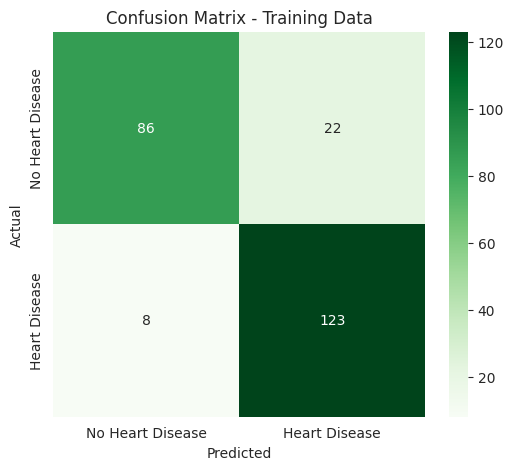

In [33]:
# Confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [35]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.63      0.72        27
           1       0.75      0.91      0.82        33

    accuracy                           0.78        60
   macro avg       0.80      0.77      0.77        60
weighted avg       0.80      0.78      0.78        60



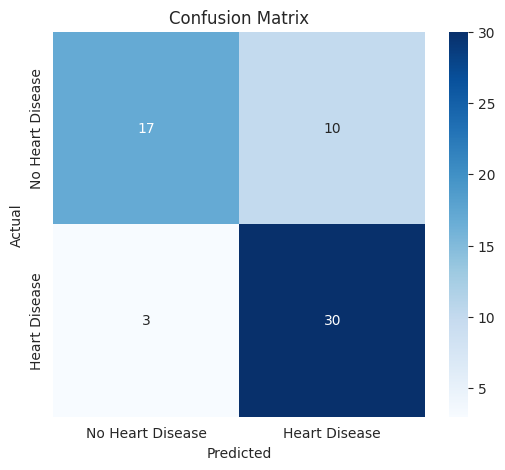

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [37]:
# Tune 'k' to find the optimal number of neighbors
accuracies = []
k_range = range(1, 21)  # Try k from 1 to 20
for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))



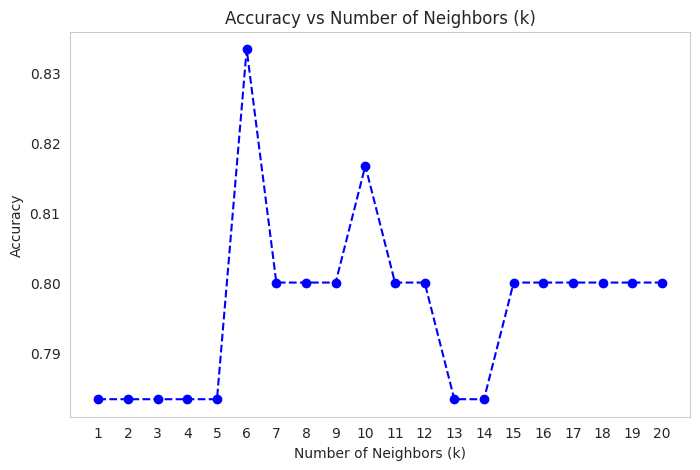

In [38]:
# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='b')
plt.title("Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid()
plt.show()

In [39]:
# Find and print the best k
best_k = k_range[accuracies.index(max(accuracies))]
print(f"The best value of k is: {best_k} with accuracy: {max(accuracies):.2f}")

The best value of k is: 6 with accuracy: 0.83


#KNN with optimized value of K=6

In [40]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# Evaluate KNN model on training data
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"New Training Accuracy: {train_accuracy:.2f}")

# Classification report for training data
print("\nClassification Report for Training Data:\n")
print(classification_report(y_train, y_train_pred))

# Predict on the test set
y_pred = knn.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'New Testing Accuracy: {accuracy:.2f}')
print("\nClassification Reportfor Testing Data:\n", classification_report(y_test, y_pred))

New Training Accuracy: 0.86

Classification Report for Training Data:

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       108
           1       0.86      0.90      0.88       131

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239

New Testing Accuracy: 0.83

Classification Reportfor Testing Data:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.81      0.91      0.86        33

    accuracy                           0.83        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.84      0.83      0.83        60



####By tuning the hyperparameter k in the KNN model from 5 to the optimal value of 6, the model's generalization capability improved significantly. While the training accuracy decreased slightly from 0.87 to 0.86, indicating reduced overfitting, the testing accuracy increased substantially from 0.78 to 0.83, showcasing better performance on unseen data. This demonstrates that finding the optimal k value achieves a better balance between bias and variance, leading to a more robust and reliable model for prediction.